Image loaded successfully!


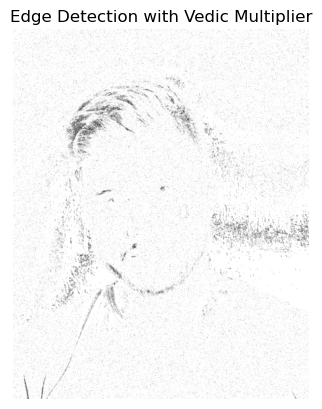

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def vedic_multiplier_4x4(a: int, b: int) -> int:
    """Vedic multiplier for two 4-bit inputs."""
    a0, a1 = a & 0b11, (a >> 2) & 0b11
    b0, b1 = b & 0b11, (b >> 2) & 0b11
    p0 = a0 * b0
    p1 = a0 * b1
    p2 = a1 * b0
    p3 = a1 * b1
    temp1 = p0
    temp2 = p1 << 2
    temp3 = p2 << 2
    temp4 = p3 << 4
    return temp1 + temp2 + temp3 + temp4

# Sobel kernel with Vedic multiplier
def sobel_vedic(image, kernel):
    rows, cols = image.shape
    result = np.zeros((rows - 2, cols - 2), dtype=np.uint8)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Apply the kernel
            value = 0
            for ki in range(3):
                for kj in range(3):
                    img_pixel = image[i + ki - 1, j + kj - 1]
                    kernel_value = kernel[ki, kj]
                    value += vedic_multiplier_4x4(img_pixel, kernel_value)
            result[i - 1, j - 1] = min(max(value, 0), 255)  # Clamp result to 8-bit range
    return result

# Load image in grayscale
image = cv2.imread('29877291image.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not loaded.")
else:
    print("Image loaded successfully!")

    # Sobel kernels
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.int8)
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.int8)

    # Apply Sobel filters using Vedic multiplier
    gradient_x = sobel_vedic(image, sobel_x)
    gradient_y = sobel_vedic(image, sobel_y)

    # Calculate gradient magnitude
    edges = np.sqrt(gradient_x.astype(float)*2 + gradient_y.astype(float)*2)
    edges = np.clip(edges, 0, 255).astype(np.uint8)

    # Display the result
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection with Vedic Multiplier')
    plt.axis('off')
    plt.show()

Image loaded successfully!


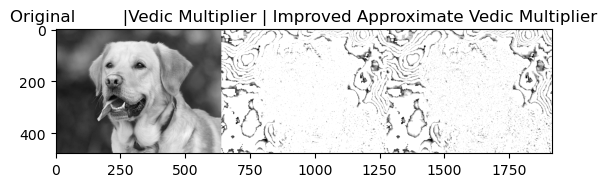

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim

def vedic_multiplier_4x4(a: int, b: int) -> int:
    """Vedic multiplier for two 4-bit inputs."""
    a0, a1 = a & 0b11, (a >> 2) & 0b11
    b0, b1 = b & 0b11, (b >> 2) & 0b11
    p0 = a0 * b0
    p1 = a0 * b1
    p2 = a1 * b0
    p3 = a1 * b1
    temp1 = p0
    temp2 = p1 << 2
    temp3 = p2 << 2
    temp4 = p3 << 4
    return temp1 + temp2 + temp3 + temp4

def improved_approx_vedic_multiplier_4x4(a: int, b: int) -> int:
    """Improved approximate Vedic multiplier for two 4-bit inputs."""
    a0, a1 = a & 0b11, (a >> 2) & 0b11
    b0, b1 = b & 0b11, (b >> 2) & 0b11
    # Approximation: Include p0, p1, and p3; ignore p2
    p0 = a0 * b0
    p1 = a0 * b1
    p3 = a1 * b1
    temp1 = p0
    temp2 = p1 << 2
    temp4 = p3 << 4
    return temp1 + temp2 + temp4

def sobel_vedic(image, kernel):
    rows, cols = image.shape
    result = np.zeros((rows - 2, cols - 2), dtype=np.uint8)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Apply the kernel
            value = 0
            for ki in range(3):
                for kj in range(3):
                    img_pixel = image[i + ki - 1, j + kj - 1]
                    kernel_value = kernel[ki, kj]
                    value += vedic_multiplier_4x4(img_pixel, kernel_value)
            result[i - 1, j - 1] = min(max(value, 0), 255)  # Clamp result to 8-bit range
    return result

def sobel_improved_approx_vedic(image, kernel):
    rows, cols = image.shape
    result = np.zeros((rows - 2, cols - 2), dtype=np.uint8)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Apply the kernel
            value = 0
            for ki in range(3):
                for kj in range(3):
                    img_pixel = image[i + ki - 1, j + kj - 1]
                    kernel_value = kernel[ki, kj]
                    value += improved_approx_vedic_multiplier_4x4(img_pixel, kernel_value)
            result[i - 1, j - 1] = min(max(value, 0), 255)  # Clamp result to 8-bit range
    return result

# Load image in grayscale
image = cv2.imread('1673942102419image.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not loaded.")
else:
    print("Image loaded successfully!")

    # Sobel kernels
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.int8)
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.int8)

    # Apply Sobel filters using Vedic multiplier
    gradient_x_vedic = sobel_vedic(image, sobel_x)
    gradient_y_vedic = sobel_vedic(image, sobel_y)
    edges_vedic = np.sqrt(gradient_x_vedic.astype(float)**2 + gradient_y_vedic.astype(float)**2)
    edges_vedic = np.clip(edges_vedic, 0, 255).astype(np.uint8)

    # Apply Sobel filters using Improved Approximate Vedic multiplier
    gradient_x_improved = sobel_improved_approx_vedic(image, sobel_x)
    gradient_y_improved = sobel_improved_approx_vedic(image, sobel_y)
    edges_improved = np.sqrt(gradient_x_improved.astype(float)**2 + gradient_y_improved.astype(float)**2)
    edges_improved = np.clip(edges_improved, 0, 255).astype(np.uint8)

    # Combine and display images
    combined = np.hstack((image[1:-1, 1:-1], edges_vedic, edges_improved))

    plt.imshow(combined, cmap='gray')
    plt.title('Original         |Vedic Multiplier | Improved Approximate Vedic Multiplier')
    plt.axis('on')
    plt.show()


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim


def vedic_multiplier_4x4(a: int, b: int) -> int:
    """Vedic multiplier for two 4-bit inputs."""
    a0, a1 = a & 0b11, (a >> 2) & 0b11
    b0, b1 = b & 0b11, (b >> 2) & 0b11
    p0 = a0 * b0
    p1 = a0 * b1
    p2 = a1 * b0
    p3 = a1 * b1
    temp1 = p0
    temp2 = p1 << 2
    temp3 = p2 << 2
    temp4 = p3 << 4
    return temp1 + temp2 + temp3 + temp4


def improved_approx_vedic_multiplier_4x4(a: int, b: int) -> int:
    """Improved approximate Vedic multiplier for two 4-bit inputs."""
    a0, a1 = a & 0b11, (a >> 2) & 0b11
    b0, b1 = b & 0b11, (b >> 2) & 0b11
    # Approximation: Include p0, p1, and p3; ignore p2
    p0 = a0 * b0
    p1 = a0 * b1
    p3 = a1 * b1
    temp1 = p0
    temp2 = p1 << 2
    temp4 = p3 << 4
    return temp1 + temp2 + temp4


def sobel_vedic(image, kernel):
    rows, cols = image.shape
    result = np.zeros((rows - 2, cols - 2), dtype=np.uint8)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            value = 0
            for ki in range(3):
                for kj in range(3):
                    img_pixel = image[i + ki - 1, j + kj - 1]
                    kernel_value = kernel[ki, kj]
                    value += vedic_multiplier_4x4(img_pixel, kernel_value)
            result[i - 1, j - 1] = min(max(value, 0), 255)
    return result


def sobel_improved_approx_vedic(image, kernel):
    rows, cols = image.shape
    result = np.zeros((rows - 2, cols - 2), dtype=np.uint8)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            value = 0
            for ki in range(3):
                for kj in range(3):
                    img_pixel = image[i + ki - 1, j + kj - 1]
                    kernel_value = kernel[ki, kj]
                    value += improved_approx_vedic_multiplier_4x4(img_pixel, kernel_value)
            result[i - 1, j - 1] = min(max(value, 0), 255)
    return result


# Compute metrics
def compute_psnr(target, prediction):
    mse = np.mean((target - prediction) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(255.0 / np.sqrt(mse))


def compute_mse(target, prediction):
    return np.mean((target - prediction) ** 2)


def compute_mae(target, prediction):
    return np.mean(np.abs(target - prediction))


def compute_ad(target, prediction):
    return np.mean(np.abs(target - prediction) / (target + 1e-8))  # Avoid division by zero


def compute_mad(target, prediction):
    return np.median(np.abs(target - prediction))


def compute_naae(target, prediction):
    return np.mean(np.abs(target - prediction) / (target + 1e-8)) * 100  # Avoid division by zero


# Load image in grayscale
image = cv2.imread('29877291image.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not loaded.")
else:
    print("Image loaded successfully!")

    # Sobel kernels
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.int8)
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.int8)

    # Apply Sobel filters using Vedic multiplier
    gradient_x_vedic = sobel_vedic(image, sobel_x)
    gradient_y_vedic = sobel_vedic(image, sobel_y)
    edges_vedic = np.sqrt(gradient_x_vedic.astype(float) ** 2 + gradient_y_vedic.astype(float) ** 2)
    edges_vedic = np.clip(edges_vedic, 0, 255).astype(np.uint8)

    # Apply Sobel filters using Improved Approximate Vedic multiplier
    gradient_x_improved = sobel_improved_approx_vedic(image, sobel_x)
    gradient_y_improved = sobel_improved_approx_vedic(image, sobel_y)
    edges_improved = np.sqrt(gradient_x_improved.astype(float) ** 2 + gradient_y_improved.astype(float) ** 2)
    edges_improved = np.clip(edges_improved, 0, 255).astype(np.uint8)

    # Calculate metrics
    psnr_vedic = compute_psnr(image[1:-1, 1:-1], edges_vedic)
    ssim_vedic = compare_ssim(image[1:-1, 1:-1], edges_vedic)
    mse_vedic = compute_mse(image[1:-1, 1:-1], edges_vedic)
    mae_vedic = compute_mae(image[1:-1, 1:-1], edges_vedic)
    ad_vedic = compute_ad(image[1:-1, 1:-1], edges_vedic)
    mad_vedic = compute_mad(image[1:-1, 1:-1], edges_vedic)
    naae_vedic = compute_naae(image[1:-1, 1:-1], edges_vedic)

    psnr_approx = compute_psnr(image[1:-1, 1:-1], edges_improved)
    ssim_approx = compare_ssim(image[1:-1, 1:-1], edges_improved)
    mse_approx = compute_mse(image[1:-1, 1:-1], edges_improved)
    mae_approx = compute_mae(image[1:-1, 1:-1], edges_improved)
    ad_approx = compute_ad(image[1:-1, 1:-1], edges_improved)
    mad_approx = compute_mad(image[1:-1, 1:-1], edges_improved)
    naae_approx = compute_naae(image[1:-1, 1:-1], edges_improved)

    # Print the metrics
    print("\nMetrics for Vedic Multiplier Logic:")
    print(f"PSNR: {psnr_vedic}")
    print(f"SSIM: {ssim_vedic}")
    print(f"MSE: {mse_vedic}")
    print(f"MAE: {mae_vedic}")
    print(f"AD: {ad_vedic}")
    print(f"MAD: {mad_vedic}")
    print(f"NAE: {naae_vedic}")

    print("\nMetrics for Improved Approximate Vedic Multiplier Logic:")
    print(f"PSNR: {psnr_approx}")
    print(f"SSIM: {ssim_approx}")
    print(f"MSE: {mse_approx}")
    print(f"MAE: {mae_approx}")
    print(f"AD: {ad_approx}")
    print(f"MAD: {mad_approx}")
    print(f"NAE: {naae_approx}")


Image loaded successfully!

Metrics for Vedic Multiplier Logic:
PSNR: 27.79032427956361
SSIM: 0.244407018438242
MSE: 108.15533153257444
MAE: 143.73006455781876
AD: 34735967.079347335
MAD: 179.0
NAE: 3473596707.9347334

Metrics for Improved Approximate Vedic Multiplier Logic:
PSNR: 27.788681314560343
SSIM: 0.17462286229749932
MSE: 108.19625515650984
MAE: 142.68281684015815
AD: 43199763.75600424
MAD: 177.0
NAE: 4319976375.600424
